In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df_raw=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv")

df=df_raw[['state_name', 'early_career_pay', 'mid_career_pay']].groupby('state_name').mean().reset_index()

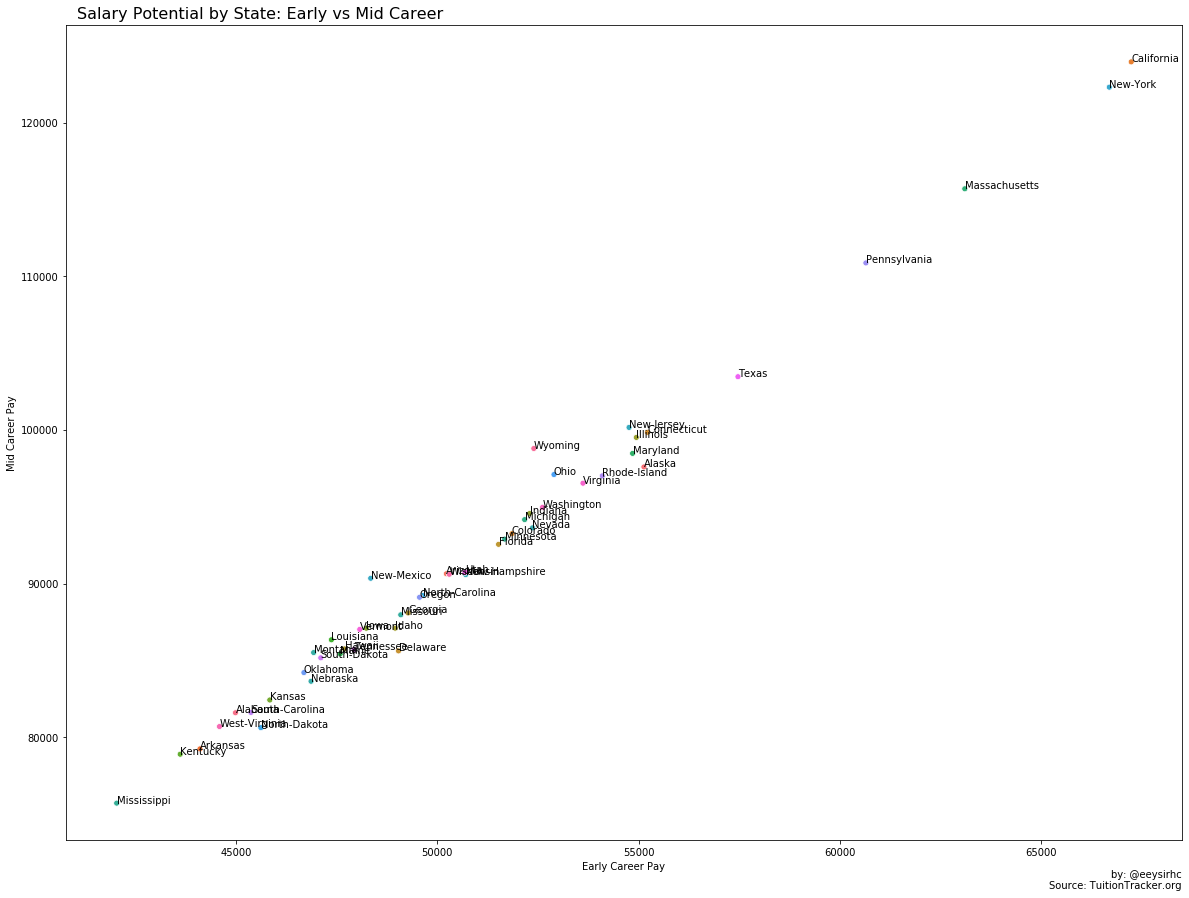

In [84]:
plt.figure(figsize=(20,15))

g=sns.scatterplot(x="early_career_pay", y="mid_career_pay", hue='state_name',
                  data=df, legend=False)

for line in range(0,df.shape[0]):
     g.text(df.early_career_pay[line]+0.01, df.mid_career_pay[line], 
     df.state_name[line], horizontalalignment='left', 
     size='medium', color='black')
        
plt.xlabel("Early Career Pay")
plt.ylabel("Mid Career Pay")
plt.title("Salary Potential by State: Early vs Mid Career",
      x=0.01, horizontalalignment="left", fontsize=16)
plt.figtext(0.9, 0.09, "by: @eeysirhc", horizontalalignment="right")
plt.figtext(0.9, 0.08, "Source: TuitionTracker.org", horizontalalignment="right")

plt.show()

In [102]:
toast=df

toast['diff']=(toast['mid_career_pay'] / toast['early_career_pay'] - 1) * 100

toast=toast.sort_values('diff', ascending=False)

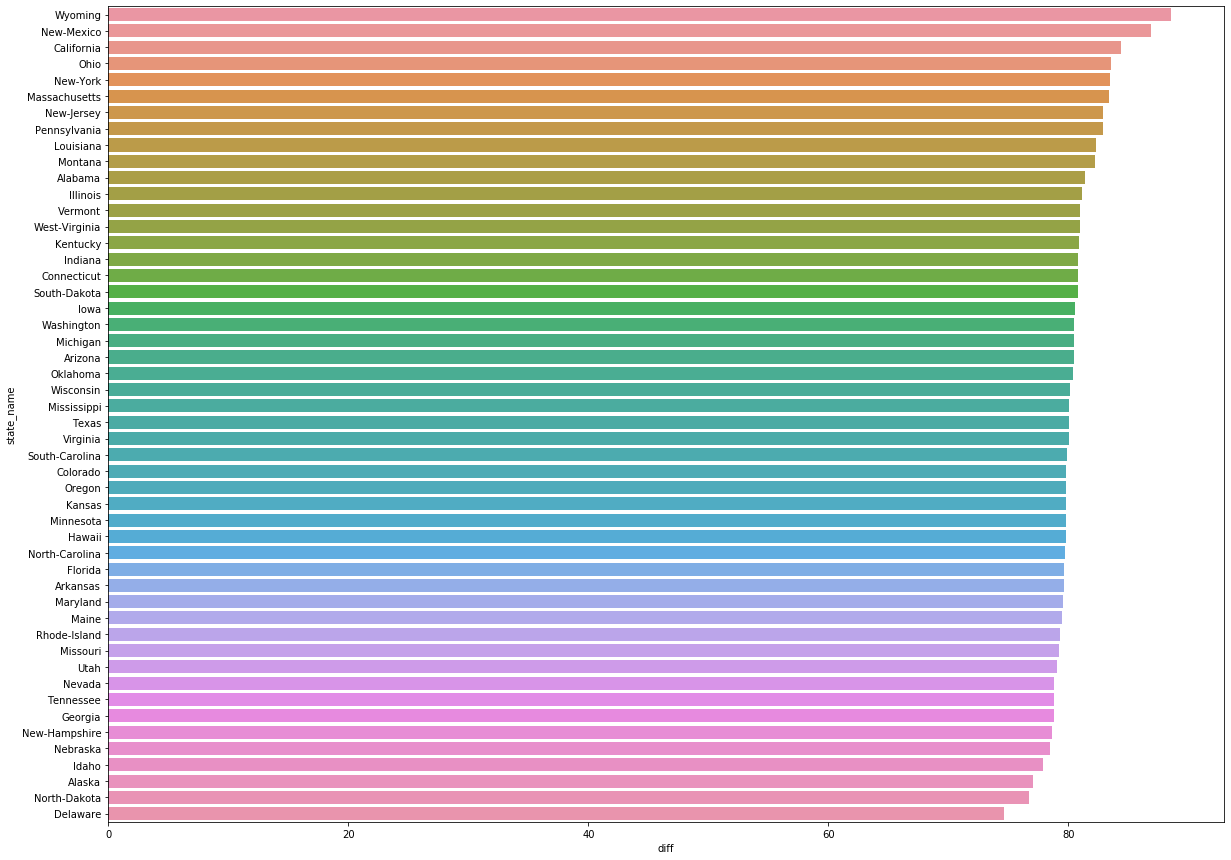

In [106]:
plt.figure(figsize=(20,15))

sns.barplot(x='diff', y='state_name', data=toast)

plt.show()